In [1]:
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
def letterbox_image(image, size):
    """
    Resize image with unchanged aspect ration using padding.
    
    Reference: (1) https://github.com/qqwweee/keras-yolo3/blob/master/yolo3/utils.py
    (2) https://blog.paperspace.com/how-to-implement-a-yolo-v3-object-detector-from-scratch-in-pytorch-part-5/
    
    Parameters
    ----------
    image: 
    size: Numpy array, that specifies (height, width). NOTE: height and width 
        are multiples of 32. It is same as input_shape used in YOLODetector
    """
    img_w, img_h = image.shape[1], image.shape[0]
    w, h = size
    scale = min(w/img_w, h/img_h)
    new_w = int(img_w * scale)
    new_h = int(img_h * scale)
    
    # Resize image
    image = cv2.resize(image, (new_w, new_h), cv2.INTER_CUBIC)
    
    # Convert color from BGR (OpenCV default) to RGB
    image = Image.fromarray(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    
    canvas = Image.new('RGB', size=size, color=(128, 128, 128))
    
    canvas.paste(image, box=((w - new_w)//2, (h - new_h)//2))
    
    return canvas

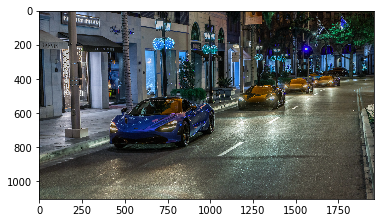

In [3]:
# Read image
image = cv2.imread('./example2.jpg')
plt.imshow(image)

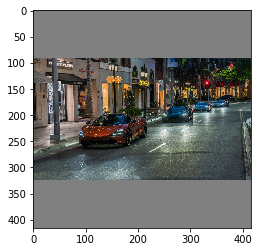

In [4]:
size = [416, 416]
lb_image = letterbox_image(image, size)
plt.imshow(lb_image)